In [1]:
import pandas as pd
data = pd.read_csv('911.csv')

In [2]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### Question 1

In [3]:
top_10_zip = data.groupby('zip')['e'].sum().reset_index()
top_10_zip['zip']=top_10_zip['zip'].astype('int')

In [4]:
top_10_zip_list = top_10_zip.nlargest(10,'e')

In [5]:
top_10_zip_list.head(10)

,zip,e
80,19401,18401
100,19464,17937
81,19403,13366
94,19446,12828
84,19406,8820
25,19002,8367
102,19468,7860
44,19046,7340
96,19454,7274
58,19090,6999


In [6]:
if 19446 in top_10_zip_list['zip'].values:
    print(True)
if 19090 in top_10_zip_list['zip'].values:
    print(True)

True
True


#### Question 2

In [7]:
twp_count = data.groupby('twp')['e'].sum().reset_index()
twp_4_count = twp_count.nlargest(4,'e')
twp_4_count.head(10)

,twp,e
26,LOWER MERION,22886
0,ABINGTON,16379
35,NORRISTOWN,15421
57,UPPER MERION,14015


In [8]:
elements =['LOWER POTTSGROVE', 'NORRISTOWN','HORSHAM', 'ABINGTON']
elements_result ={}
for elem in elements:
    if elem in twp_4_count['twp'].values:
        elements_result[elem] = True
    else:
        elements_result[elem] = False
print(elements_result)

{'LOWER POTTSGROVE': False, 'NORRISTOWN': True, 'HORSHAM': False, 'ABINGTON': True}


#### Question 3

In [9]:
data[['reason','reason_detail']] = data['title'].str.split(':',expand=True)
reason_count = data.groupby('reason')['e'].sum().reset_index()
reason_count_top = reason_count.nlargest(2,'e')
reason_count_top.head(10)

,reason,e
0,EMS,133234
2,Traffic,93400


#### Question 4

In [10]:
import matplotlib.pyplot as plot

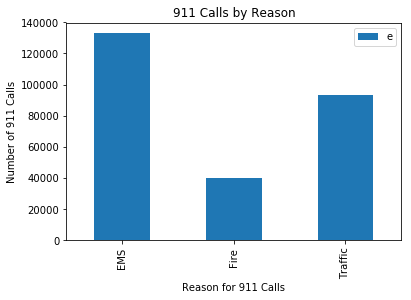

In [11]:
reason_count.plot(kind='bar',x='reason',y='e',title="911 Calls by Reason")
plot.xlabel("Reason for 911 Calls")
plot.ylabel("Number of 911 Calls")
plot.show()



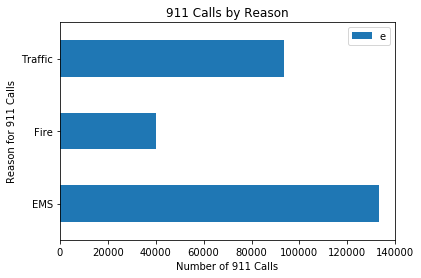

In [12]:
reason_count.plot(kind='barh',x='reason',y='e',title="911 Calls by Reason")
plot.ylabel("Reason for 911 Calls")
plot.xlabel("Number of 911 Calls")
plot.show()

#### Question 5

In [13]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,reason_detail
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


In [14]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [17]:
data['date'] = data['timeStamp'].dt.date
data['day_of_week'] = data['timeStamp'].dt.day_name()

In [18]:
date_count = data.groupby(['day_of_week','reason'])['e'].sum().reset_index()
date_count_ems = date_count[date_count['reason']=='EMS'].nlargest(1,'e')
date_count_ems.head()

,day_of_week,reason,e
0,Friday,EMS,19938


#### Question 6

In [19]:
days = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
date_count['weekday'] = date_count['day_of_week'].apply(lambda x: days[x])
date_count.head(10)

,day_of_week,reason,e,weekday
0,Friday,EMS,19938,4
1,Friday,Fire,5823,4
2,Friday,Traffic,14945,4
3,Monday,EMS,19389,0
4,Monday,Fire,5817,0
5,Monday,Traffic,13797,0
6,Saturday,EMS,18229,5
7,Saturday,Fire,5464,5
8,Saturday,Traffic,11524,5
9,Sunday,EMS,17384,6


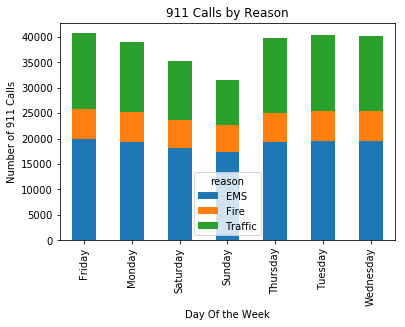

In [20]:
pivot_date_count = date_count.pivot(index = 'day_of_week',columns='reason',values='e').reset_index()
pivot_date_count['weekday'] = pivot_date_count['day_of_week'].apply(lambda x: days[x])


pivot_date_count = pivot_date_count[['day_of_week','EMS','Fire','Traffic']]


pivot_date_count.plot(kind='bar',x='day_of_week',title="911 Calls by Reason", stacked=True)
plot.xlabel("Day Of the Week")
plot.ylabel("Number of 911 Calls")
plot.show()

#### Question 7

In [21]:
data['month_name'] = data['timeStamp'].dt.strftime('%b')
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,reason_detail,date,day_of_week,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,Thursday,Dec
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,Thursday,Dec
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,Thursday,Dec
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,Thursday,Dec
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,Thursday,Dec


In [22]:
month_count = data.groupby(['month_name','reason'])['e'].sum().reset_index()
months = {'Jan':0,'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11}

month_count.head()

,month_name,reason,e
0,Apr,EMS,11464
1,Apr,Fire,3331
2,Apr,Traffic,7548
3,Aug,EMS,11887
4,Aug,Fire,3769


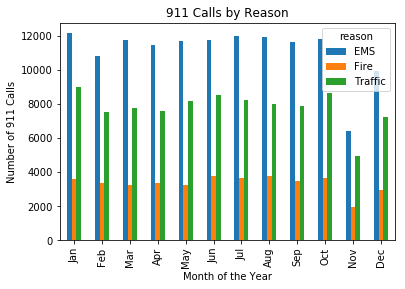

In [23]:
pivot_month_count = month_count.pivot(index = 'month_name',columns='reason',values='e').reset_index()
pivot_month_count['month_nbr'] = pivot_month_count['month_name'].apply(lambda x: months[x])
pivot_month_count = pivot_month_count.sort_values('month_nbr').reset_index()
pivot_month_count = pivot_month_count[['month_name','EMS','Fire','Traffic']]
pivot_month_count.head()


pivot_month_count.plot(kind='bar',x='month_name',title="911 Calls by Reason", sort_columns='month_nbr')
plot.xlabel("Month of the Year")
plot.ylabel("Number of 911 Calls")
plot.show()

#### Question 8

In [24]:
import folium as fo
from folium import plugins

In [26]:
data.head(15)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,reason_detail,date,day_of_week,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,Thursday,Dec
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,Thursday,Dec
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,Thursday,Dec
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,Thursday,Dec
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,Thursday,Dec
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY,2015-12-10,Thursday,Dec
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,NAUSEA/VOMITING,2015-12-10,Thursday,Dec
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,RESPIRATORY EMERGENCY,2015-12-10,Thursday,Dec
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,SYNCOPAL EPISODE,2015-12-10,Thursday,Dec
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,VEHICLE ACCIDENT -,2015-12-10,Thursday,Dec


In [57]:
data_traffic = data[data['reason']=='Traffic']
lat = list(data_traffic['lat'])
long = list(data_traffic['lng'])

title =list(data_traffic['title'])
time =list(data_traffic['timeStamp'])
addr = list(data_traffic['addr'])
twp = list(data_traffic['twp'])

In [58]:
mapsf = fo.Map(location=[40.297876,-75.581294], tiles='OpenStreetMap', zoom_start=10,control_scale =True)
fg = fo.FeatureGroup(name="911callsPA")


for lat, long, title in zip(lat, long, title):
    popup_var = f'Title: {title} '
    fg.add_child(fo.Marker(location=[lat, long], popup=popup_var, icon=fo.Icon(color='blue')))

mapsf.add_child(fg)
mapsf.save("911Traffic.html")